<a href="https://colab.research.google.com/github/styxOO7/Flower-Classification-using-InceptionV3-/blob/main/ImageClassificationProjectGradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gradio-3.17.1-py3-none-any.whl (14.2 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gradio as gr

# Flow:
1. Build a Model.
2. Define Function to take input image and predict.
3. Gradio Class with parameters: prediction function, show output.

In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

# Get Data from TF API:

In [ ]:
import pathlib      # treat plain strings as paths
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)       # load contents into dir

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


/root/.keras/datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg


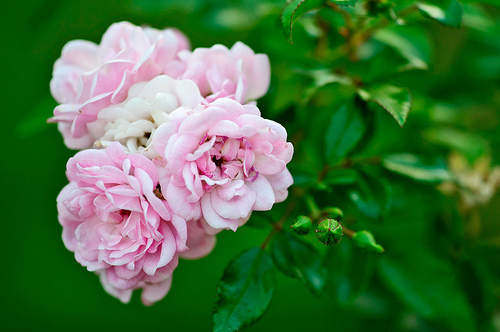

In [ ]:
import PIL
roses = list(data_dir.glob('roses/*'))      # category
print(roses[0])

temp_image = PIL.Image.open(roses[0])
temp_image
# w, h = temp_image.size
# print(w, h)

# Generating Training and Validation data:

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_height, img_width = 180, 180
train_ds = image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=32)
val_ds = image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
len(train_ds)           # make DF by dividing whole dataset into batches

92

In [ ]:
len(val_ds)

23

Now, this train_ds and val_ds are batchdataset Object in Tensorflow which return images and labels.

# Visualize Dataset:

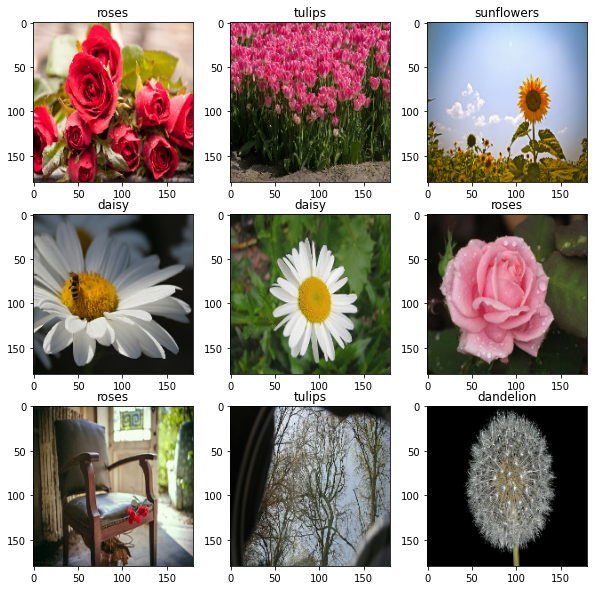

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):     
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))       # imshow works with pixeled array only
        plt.title(class_names[labels[i]])
        # plt.axis("off")

# CNN - 64%:

In [ ]:
num_classes = len(class_names)

model = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # flatten all 2d,3d into 1d:
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=num_classes, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 118s 1s/step - loss: 1.3368 - accuracy: 0.4166 - val_loss: 1.0679 - val_accuracy: 0.5872
Epoch 2/10
92/92 [==============================] - 115s 1s/step - loss: 1.0202 - accuracy: 0.5960 - val_loss: 0.9975 - val_accuracy: 0.6022
Epoch 3/10
92/92 [==============================] - 131s 1s/step - loss: 0.8470 - accuracy: 0.6785 - val_loss: 0.9046 - val_accuracy: 0.6376
Epoch 4/10
92/92 [==============================] - 130s 1s/step - loss: 0.6449 - accuracy: 0.7548 - val_loss: 1.0376 - val_accuracy: 0.6063
Epoch 5/10
92/92 [==============================] - 121s 1s/step - loss: 0.4337 - accuracy: 0.8437 - val_loss: 1.2517 - val_accuracy: 0.6308
Epoch 6/10
92/92 [==============================] - 117s 1s/step - loss: 0.2648 - accuracy: 0.9050 - val_loss: 1.2891 - val_accuracy: 0.6253
Epoch 7/10
92/92 [==============================] - 115s 1s/step - loss: 0.1421 - accuracy: 0.9554 - val_loss: 1.5718 - val_accuracy: 0.6444
Epoch 8/10
92

# Pre Trained Model - 78 %:
Inceptionv3

In [ ]:
epochs= 10
from tensorflow.keras.applications import InceptionV3
model1= Sequential()

pretrained_model= InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
print(len(pretrained_model.layers))

for layer in pretrained_model.layers:
        layer.trainable=False
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model1.add(pretrained_model)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(num_classes,activation='softmax'))

312


In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model1.fit(
  train_ds,
  validation_data=val_ds,
  steps_per_epoch=5,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 73s 16s/step - loss: 1.6285 - accuracy: 0.3187 - val_loss: 1.1417 - val_accuracy: 0.5681
Epoch 2/10
5/5 [==============================] - 66s 16s/step - loss: 0.9853 - accuracy: 0.6125 - val_loss: 1.0640 - val_accuracy: 0.6253
Epoch 3/10
5/5 [==============================] - 67s 16s/step - loss: 1.1945 - accuracy: 0.5562 - val_loss: 0.8312 - val_accuracy: 0.6812
Epoch 4/10
5/5 [==============================] - 65s 16s/step - loss: 0.7924 - accuracy: 0.6875 - val_loss: 0.9122 - val_accuracy: 0.6431
Epoch 5/10
5/5 [==============================] - 66s 16s/step - loss: 0.8553 - accuracy: 0.6500 - val_loss: 0.9657 - val_accuracy: 0.6757
Epoch 6/10
5/5 [==============================] - 64s 15s/step - loss: 0.7161 - accuracy: 0.7500 - val_loss: 0.8244 - val_accuracy: 0.6812
Epoch 7/10
5/5 [==============================] - 65s 16s/step - loss: 0.7761 - accuracy: 0.7250 - val_loss: 0.6483 - val_accuracy: 0.7643
Epoch 8/10
5/5 [===========

# Save Model:

In [ ]:
from keras.models import load_model
model.save("cnn.h5")
model1.save("inception.h5")
loaded_model = load_model("cnn.h5")
# loss, accuracy = loaded_model.evaluate(test_data, test_targets)

# Gradio:

In [ ]:
def predict_image(img):
    img_4d = img.reshape(-1, img_width, img_height, 3)      # 4D coz model trained on multiple 3Ds
    prediction = model1.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(num_classes)}

In [ ]:
image = gr.inputs.Image(shape=(img_height, img_width))
label = gr.outputs.Label(num_top_classes=num_classes)

gr.Interface(fn=predict_image, inputs=image, outputs=label, title="Flower Classification using InceptionV3", interpretation='default').launch(debug='True', share='True')

#Live: 
https://huggingface.co/spaces/Re1e9/Flower_Classification_using_InceptionV3